<a href="https://colab.research.google.com/github/kaneda59/Classify_pictures_with_Deep_Learning/blob/main/Copie_de_deprez_fabrice_1_notebook_082023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install opencv-python
# !pip install scikit-learn
# !pip install keras
# !pip install tensorflow --user
# !pip install pydot graphviz
# !pip install wordcloud
# !pip install missingno

In [2]:
!mkdir datas

In [3]:
!cd datas
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"

--2023-09-08 06:34:26--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  19.8MB/s    in 31s     

2023-09-08 06:34:56 (24.8 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [4]:
!mv images.tar ./datas

In [5]:
!cd datas ; tar -xvf images.tar

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane

In [6]:
# import  des librairies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from wordcloud import WordCloud
import missingno as msno
from IPython.display import Markdown, display

In [7]:
# -- cette fonction permet d'afficher du markdown dans la réponse de l'exécution d'un code
def markdown(string):
    display(Markdown(string))


# -- cette fonction permet d'afficher les informations complètes d'un dataframe
def show_informations(df, title):
    markdown(f'*** {title} ***')
    print("Total: {} enregistrements pour {} variables".format(df.shape[0],df.shape[1]))
    print(df.columns)
    print(df.info(verbose= True, show_counts=True))
    msno.bar(df)

# Chargement des données

In [8]:
path = "./datas/Images"
list = os.listdir(path)
print("nombre de classe de chiens : ", (len(list)))

nombre de classe de chiens :  120


In [9]:
!ls ./datas

Images	images.tar


Le dossier image contient 120 classes de chiens réparties dans 120 dossiers différents, il faut donc les stocker dans un dataframe

In [10]:
data = pd.DataFrame(list, columns=['Id_breed'])
data['breed_name'] = data['Id_breed'].apply(lambda x: x.split('-')[1])
data['Id']=data['Id_breed'].apply(lambda x: x.split('-')[0])
nb =[]
for name in data.Id_breed:
    nb.append(len(os.listdir(path + "/" + name)))
data['nb']=nb
print("nombre total d'images:", data['nb'].sum())

nombre total d'images: 20580


In [11]:
data.sample(5)

Id_breed        breed_name         Id   nb
110          n02113023-Pembroke          Pembroke  n02113023  181
64   n02089973-English_foxhound  English_foxhound  n02089973  157
21   n02102040-English_springer  English_springer  n02102040  159
71              n02096177-cairn             cairn  n02096177  197
74   n02113978-Mexican_hairless  Mexican_hairless  n02113978  155

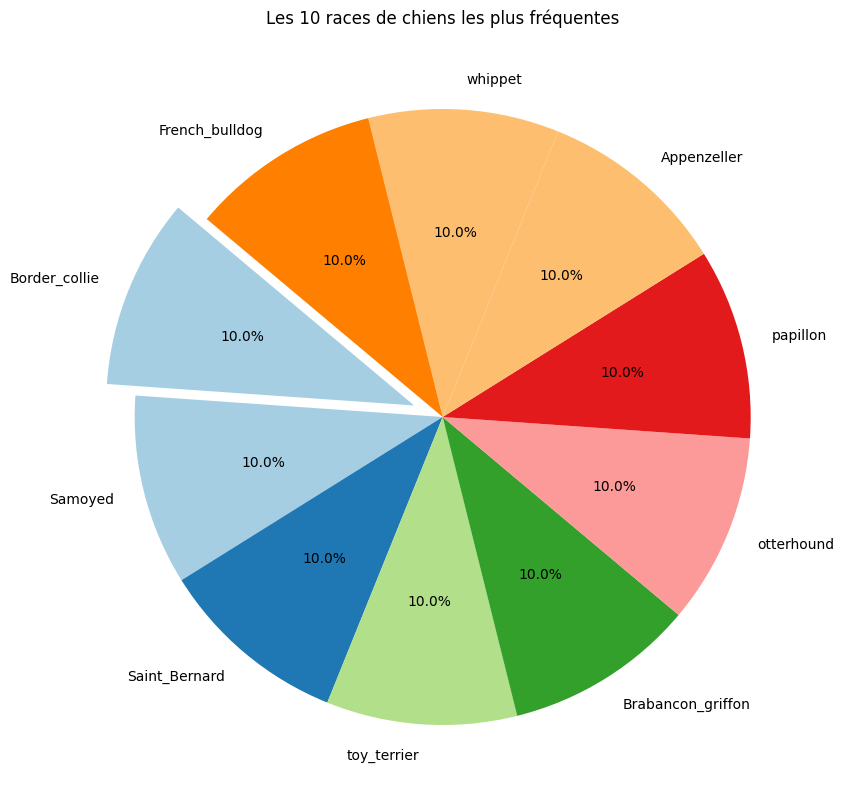

In [12]:
# Counting occurrences of each breed
breed_counts = data['breed_name'].value_counts()

# Colors
colors = plt.cm.Paired(np.linspace(0, 1, 15))

# Extracting top 10 breeds for clarity
top_breeds = breed_counts[:10]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # exploding 1st slice for emphasis

# Plotting
plt.figure(figsize=(12, 10))
plt.pie(top_breeds, labels=top_breeds.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("Les 10 races de chiens les plus fréquentes")
plt.show()

In [13]:
# faire un bar plot avec les 120 éléments

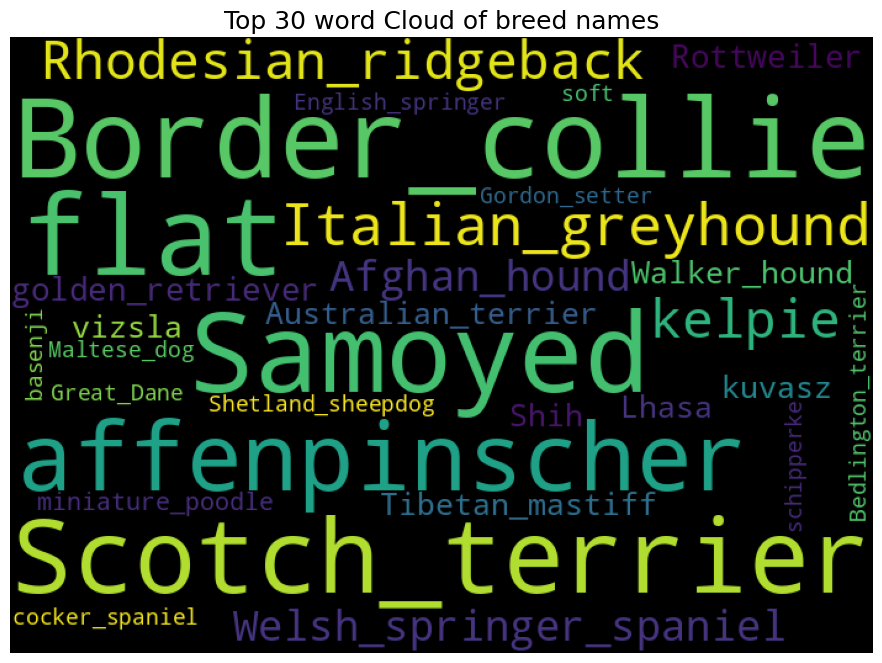

In [14]:
fig = plt.figure(1, figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=700, height=500,
                      background_color="black",max_words=30, relative_scaling=1,
                      normalize_plurals=False).generate(" ".join(data.breed_name))

ax.imshow(wordcloud)
ax.axis("off")
plt.title("Top 30 word Cloud of breed names", fontsize=18)
plt.show()

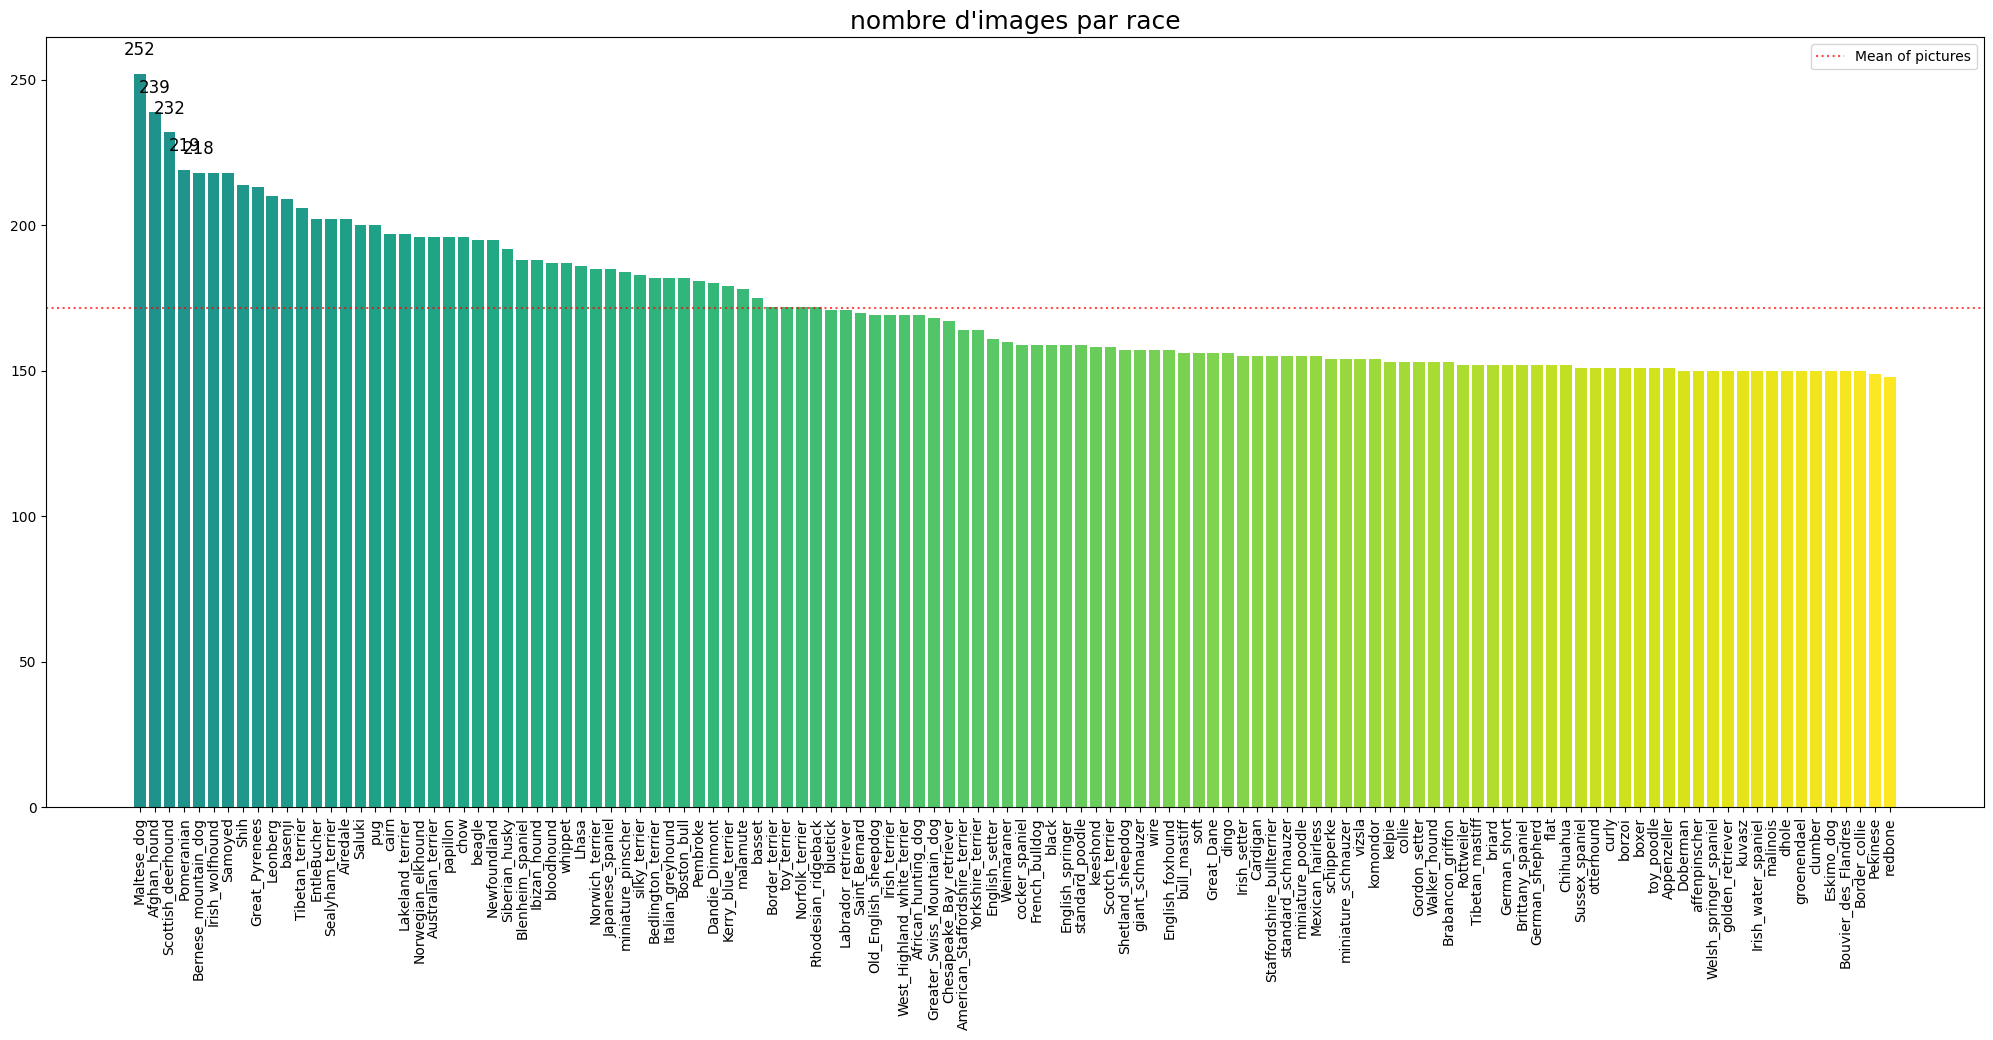

In [15]:
# trie des données sur 'nb'
df_sorted = data.sort_values(by='nb', ascending=False)

# creation d'un dégradé de couleur basé sur 'nb'
color_gradient = plt.cm.viridis(np.linspace(0.5, 1, len(df_sorted)))

# traçage
plt.figure(figsize=(25, 10))

bars = plt.bar(df_sorted['breed_name'], df_sorted['nb'], color=color_gradient)

# Ajouter des annotations aux 5 meilleures races
for i, bar in enumerate(bars[:5]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')

plt.axhline(df_sorted["nb"].mean(), color='red', alpha=.7, linestyle=':', label="Mean of pictures")
plt.title("nombre d'images par race", color='black', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

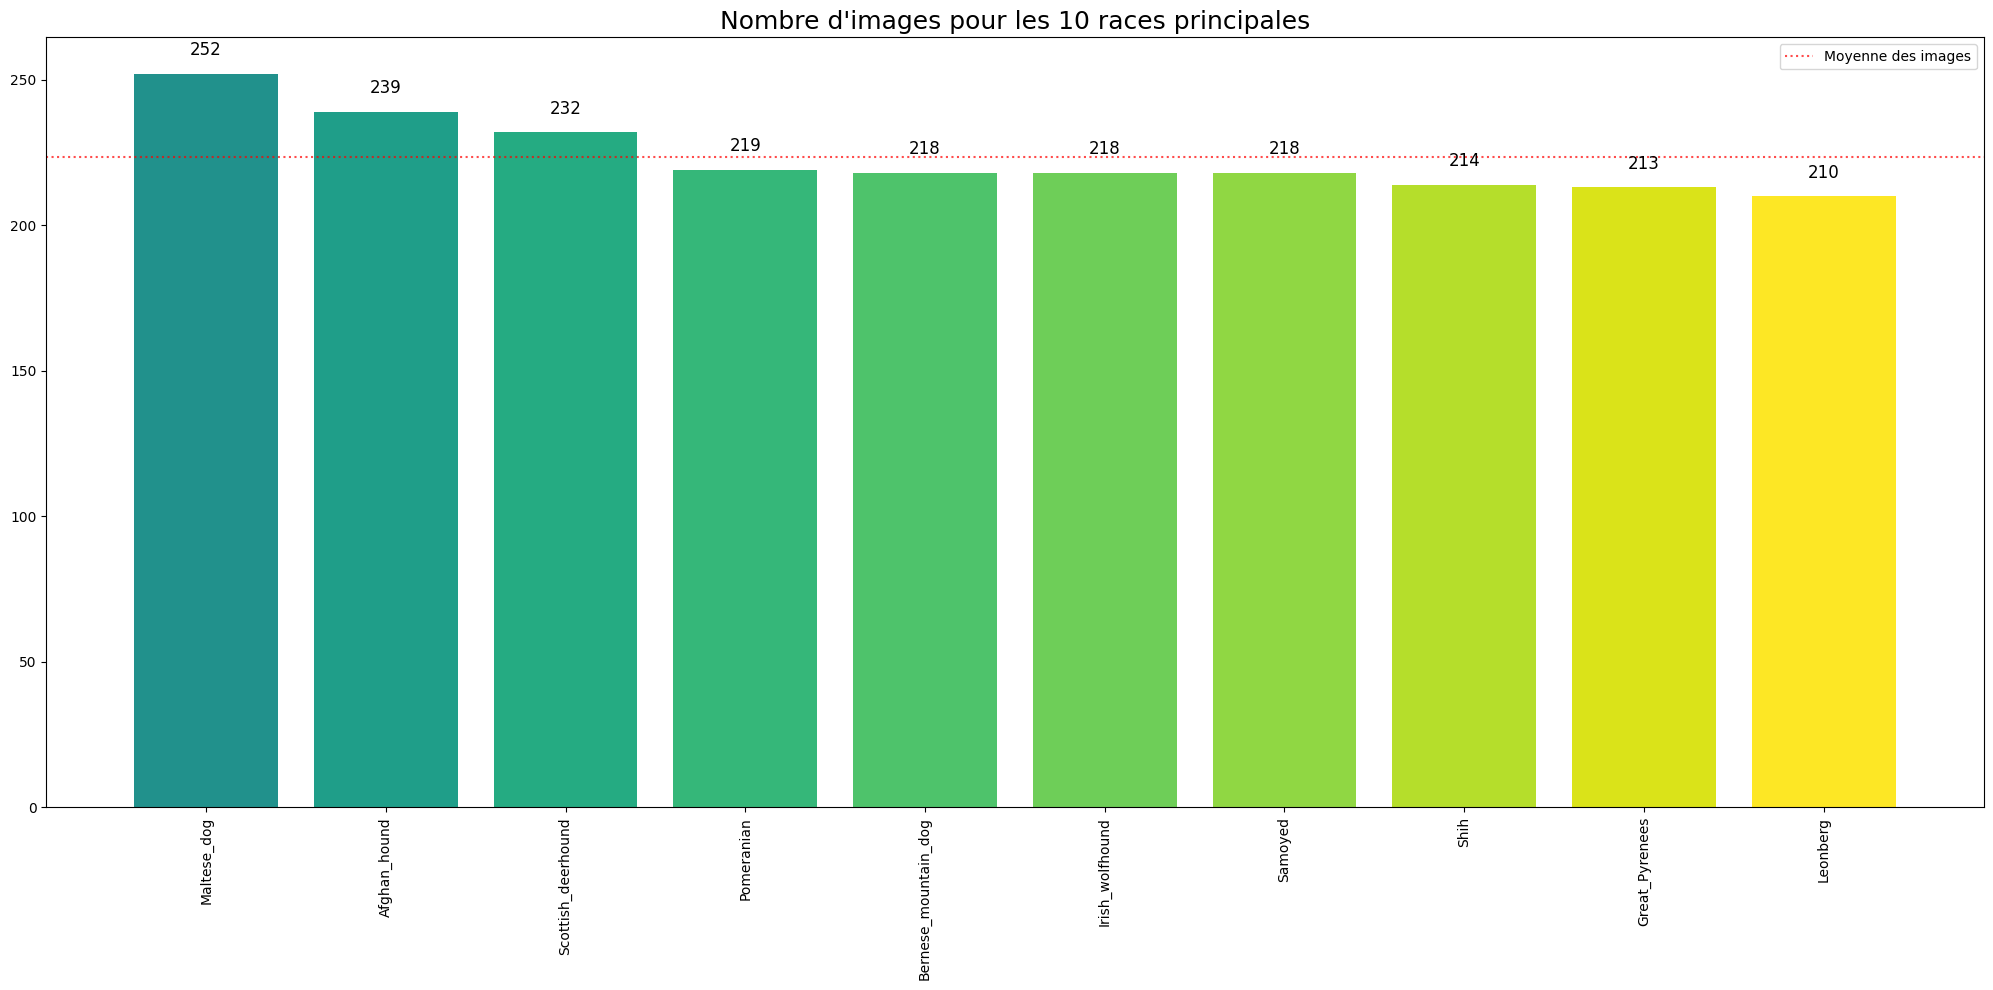

In [16]:
# Filtre pour ne garder que les 10 premières races par "nb".
top_10 = df_sorted.iloc[:10]

# Créez un gradient de couleur pour les 10 premiers.
color_gradient = plt.cm.viridis(np.linspace(0.5, 1, len(top_10)))

# Traçage
plt.figure(figsize=(25, 10))

bars = plt.bar(top_10['breed_name'], top_10['nb'], color=color_gradient)

# Ajouter des annotations à chacune des 10 races les plus importantes
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')

plt.axhline(top_10["nb"].mean(), color='red', alpha=.7, linestyle=':', label="Moyenne des images")
plt.title("Nombre d'images pour les 10 races principales", color='black', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

Il faut créer un dataframe qui contient le chemin de toutes les images / races, ainsi que les caractéristiques de ces images

In [17]:
#liste de répertoires
uri_list=[]
for classe in data['Id_breed'].values:
    images = os.listdir(path + "/" + classe)
    for i in range(len(images)):
        uri_list.append(path+"/"+ classe +"/"+images[i])

#liste des images forme
df_img=[]
for uri in uri_list:
    df_img.append(mpimg.imread(uri).shape)

#data frame
df_img = pd.DataFrame(df_img, index = uri_list,columns=['heigth','width','color'])
#liste des races qui correspondent à chaque dossier
y = []
for j in range(120):
    for k in range(data.nb.values[j]):
        y.append(data.breed_name.values[j])

df_img['bread_name'] = y

*** analyse du dataframe image ***

Total: 20580 enregistrements pour 4 variables
Index(['heigth', 'width', 'color', 'bread_name'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 20580 entries, ./datas/Images/n02106166-Border_collie/n02106166_18.jpg to ./datas/Images/n02096437-Dandie_Dinmont/n02096437_1448.jpg
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   heigth      20580 non-null  int64 
 1   width       20580 non-null  int64 
 2   color       20580 non-null  int64 
 3   bread_name  20580 non-null  object
dtypes: int64(3), object(1)
memory usage: 803.9+ KB
None


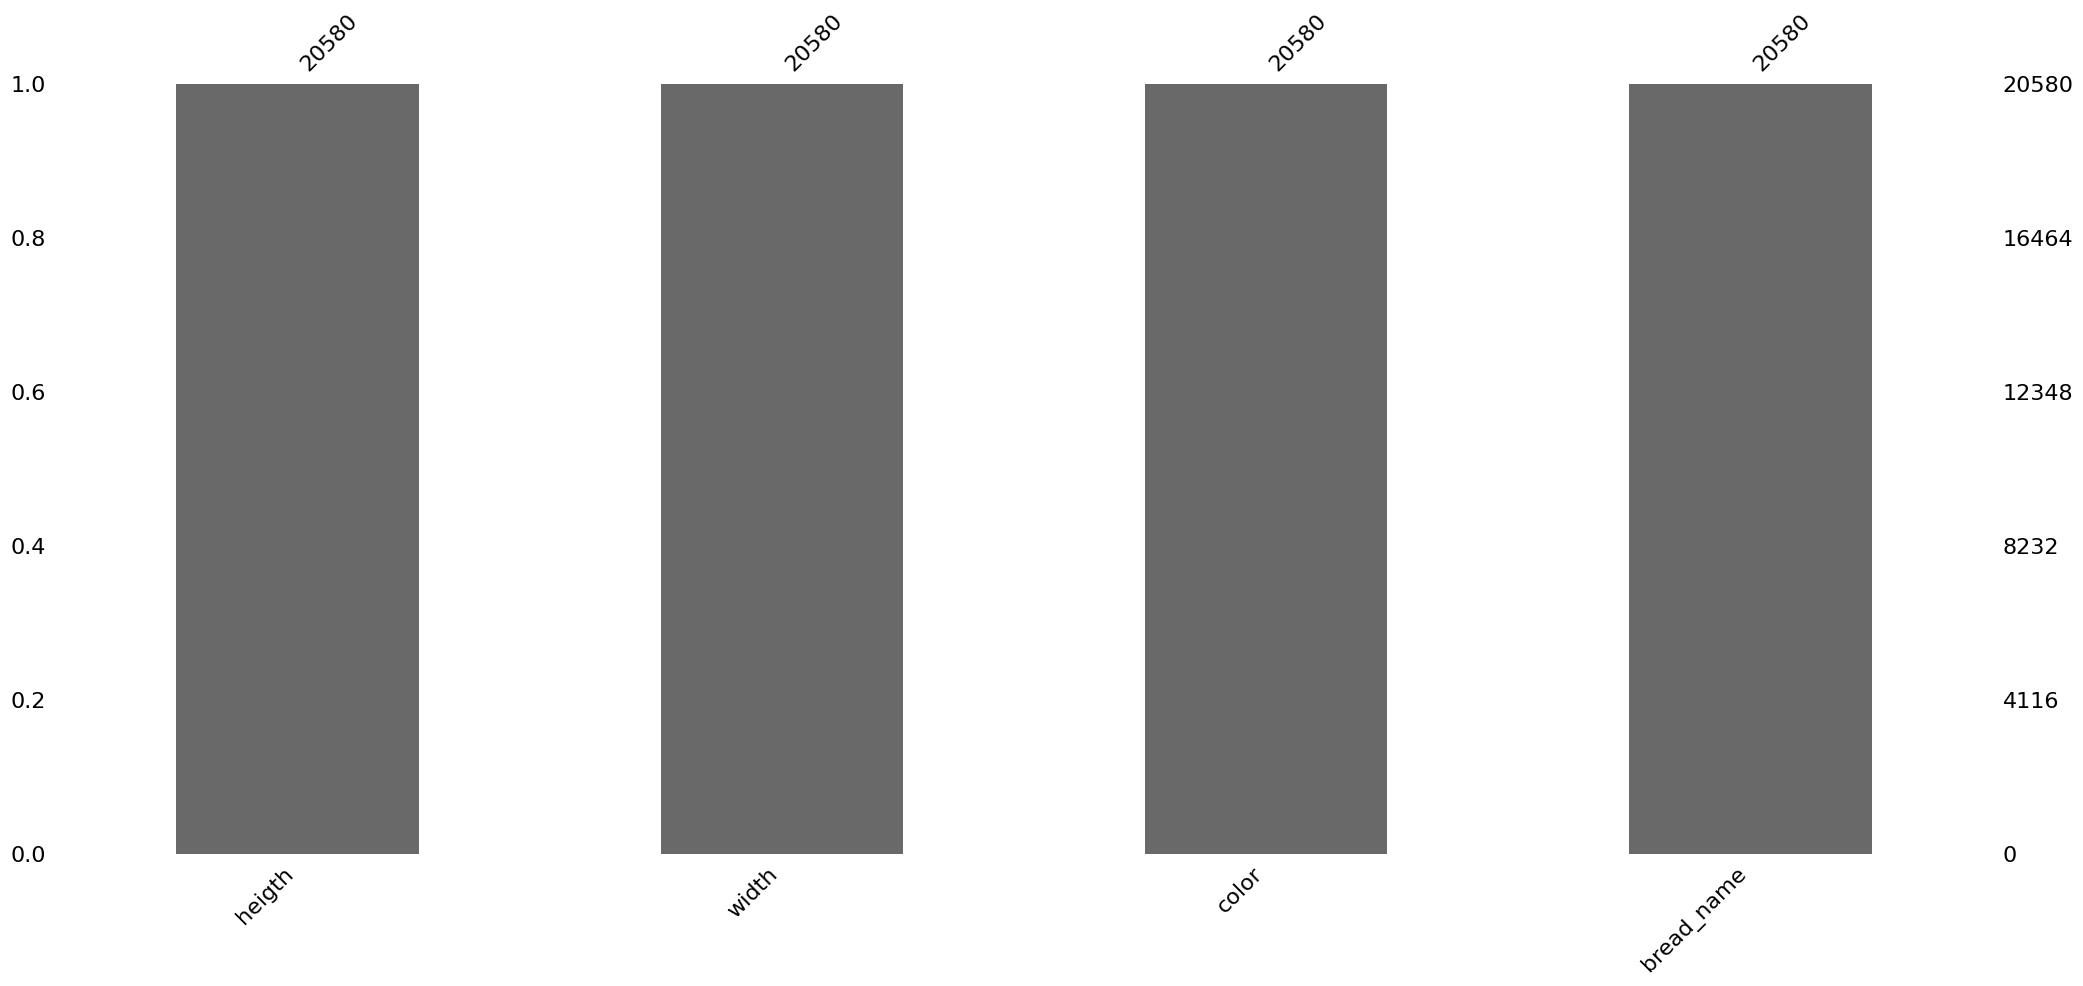

In [18]:
show_informations(df_img, 'analyse du dataframe image')

In [19]:
df_img.sample(10, random_state=1)

heigth  width  color  \
./datas/Images/n02113978-Mexican_hairless/n0211...     500    420      3   
./datas/Images/n02091244-Ibizan_hound/n02091244...     450    299      3   
./datas/Images/n02090622-borzoi/n02090622_5890.jpg     266    317      3   
./datas/Images/n02099429-curly-coated_retriever...     305    411      3   
./datas/Images/n02100236-German_short-haired_po...     375    500      3   
./datas/Images/n02096437-Dandie_Dinmont/n020964...     500    364      3   
./datas/Images/n02102177-Welsh_springer_spaniel...     375    500      3   
./datas/Images/n02092339-Weimaraner/n02092339_1...     375    500      3   
./datas/Images/n02108422-bull_mastiff/n02108422...     297    500      3   
./datas/Images/n02092002-Scottish_deerhound/n02...     527    500      3   

                                                                bread_name  
./datas/Images/n02113978-Mexican_hairless/n0211...        Mexican_hairless  
./datas/Images/n02091244-Ibizan_hound/n02091244...            Ibizan_hound  
./datas/Images/n02090622-borzoi/n02090622_5890.jpg                  borzoi  
./datas/Images/n02099429-curly-coated_retriever...                   curly  
./datas/Images/n02100236-German_short-haired_po...            German_short  
./datas/Images/n02096437-Dandie_Dinmont/n020964...          Dandie_Dinmont  
./datas/Images/n02102177-Welsh_springer_spaniel...  Welsh_springer_spaniel  
./datas/Images/n02092339-Weimaraner/n02092339_1...              Weimaraner  
./datas/Images/n02108422-bull_mastiff/n02108422...            bull_mastiff  
./datas/Images/n02092002-Scottish_deerhound/n02...      Scottish_deerhound

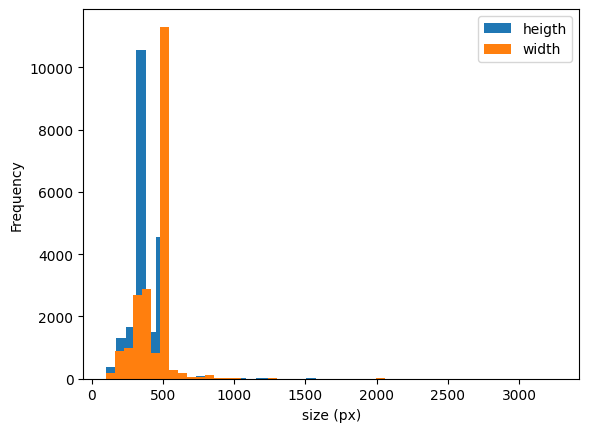

la moyenne (lageur,hauteur) par image:  (385.86, 442.53)


In [20]:
df_img['heigth'].plot.hist(bins=35, alpha=1)
df_img['width'].plot.hist(bins=50, alpha=1)
plt.xlabel('size (px)')
plt.legend(['heigth','width'])
plt.show()
print("la moyenne (lageur,hauteur) par image: ", (round(df_img['heigth'].mean(),2),round(df_img['width'].mean(),2)))

In [21]:
df_img['color'].value_counts()

3    20579
4        1
Name: color, dtype: int64

toutes les images sont en 3 couleurs (RGB), il n'y a qu'une d'entre elle qui a 4 couleurs RGBA, il faut modifier cette dernière en RGB

In [22]:
 df_img[df_img.color==4]

heigth  width  color  \
./datas/Images/n02105855-Shetland_sheepdog/n021...     189    213      4   

                                                           bread_name  
./datas/Images/n02105855-Shetland_sheepdog/n021...  Shetland_sheepdog

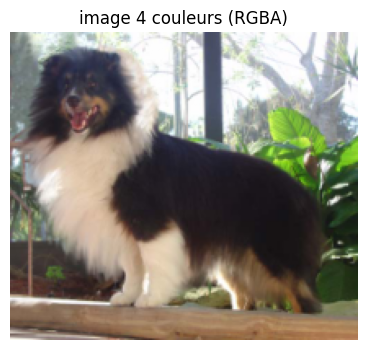

In [23]:
plt.figure(figsize=(10,4))
idx = df_img[df_img.color==4].first_valid_index()
if idx is not None:
    img4 = mpimg.imread(idx)
    plt.imshow(img4)
    plt.title("image 4 couleurs (RGBA)")
    plt.axis('off')
    plt.show()
else:
    print("Aucune ligne avec color==4 trouvée")

In [24]:
# dossier
#name_img4 = idx.split('/')[-1]
#idx=idx.replace(name_img4,'')
#os.chdir(idx)

# image fractionnée
#r_img, g_img, b_img, a_img = cv2.split(img4)

# fusionner l'échelle rgb
#img3 = cv2.merge((r_img, g_img, b_img))

# on écrase l'image RGBA par la RGB
#cv2.imwrite('n02105855_2933.jpg', img3)

#img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

#plt.figure(figsize=(10,4))
#plt.imshow(img3_rgb)
#plt.title("Image 3 couleurs (RGB)")
#plt.axis('off')
#plt.show()

### Affichons quelques exemples :

In [25]:
print(path)

./datas/Images


In [26]:
print(df_img.head())

                                                    heigth  width  color  \
./datas/Images/n02106166-Border_collie/n0210616...     323    360      3   
./datas/Images/n02106166-Border_collie/n0210616...     300    400      3   
./datas/Images/n02106166-Border_collie/n0210616...     375    500      3   
./datas/Images/n02106166-Border_collie/n0210616...     375    500      3   
./datas/Images/n02106166-Border_collie/n0210616...     375    500      3   

                                                       bread_name  
./datas/Images/n02106166-Border_collie/n0210616...  Border_collie  
./datas/Images/n02106166-Border_collie/n0210616...  Border_collie  
./datas/Images/n02106166-Border_collie/n0210616...  Border_collie  
./datas/Images/n02106166-Border_collie/n0210616...  Border_collie  
./datas/Images/n02106166-Border_collie/n0210616...  Border_collie  


In [27]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Num = 6  # Nombre d'images à afficher par classe
Num_classes = 5  # Nombre de classes à afficher

# Sélection aléatoire de quelques classes
breed_samples = np.random.choice(data['Id_breed'].unique(), Num_classes)

base_path = Path("./datas/images").resolve()  # Chemin absolu vers le répertoire de base des images

for breed in breed_samples:
    breed_path = base_path / breed  # Chemin du sous-dossier pour la race actuelle

    #print(f"Tentative d'accès au dossier: {breed_path}")  # Ceci affichera le chemin absolu

    # Récupérer les images du sous-dossier de la race actuelle
    try:
        all_files = os.listdir(breed_path)
        images = [f for f in all_files if f.endswith('.jpg')][:Num]  # prendre seulement 'Num' images

    except FileNotFoundError:
        print(f"Erreur avec la classe {breed} : Le chemin d’accès est introuvable")
        continue

    fig = plt.figure(figsize=(12,4))
    plt.suptitle("{}".format(breed.split("-")[1]), y=.01, color="black", fontsize=17)

    for i, img_name in enumerate(images):
        img_path = breed_path / img_name
        try:
            #print(f"Tentative de chargement de l'image depuis: {img_path}")
            img = mpimg.imread(str(img_path))
            plt.subplot(1, Num, i+1)
            plt.imshow(img)
            plt.axis('off')
        except Exception as e:
            print(f"Erreur lors du chargement de l'image depuis {img_path}. Erreur: {e}")
    plt.show()

Erreur avec la classe n02104029-kuvasz : Le chemin d’accès est introuvable
Erreur avec la classe n02086646-Blenheim_spaniel : Le chemin d’accès est introuvable
Erreur avec la classe n02095889-Sealyham_terrier : Le chemin d’accès est introuvable
Erreur avec la classe n02098105-soft-coated_wheaten_terrier : Le chemin d’accès est introuvable
Erreur avec la classe n02112350-keeshond : Le chemin d’accès est introuvable


Les images sont très différentes les unes des autres, il faut donc procéder a un esemble de transformations pour les équilibrer

## Augmentations

Les transformations d'images, souvent appelées augmentations de données, jouent un rôle crucial dans le deep learning, en particulier dans la formation de modèles de vision par ordinateur. Elles permettent d'enrichir le jeu de données sans collecter de nouvelles images, rendant le modèle plus robuste et améliorant sa capacité de généralisation.

Voici quelques transformations couramment utilisées pour l'augmentation des données dans la vision par ordinateur :

1. **Rotation** : Faire pivoter l'image d'un certain angle.

2. **Translation** : Déplacer l'image horizontalement ou verticalement.

3. **Redimensionnement (Rescaling)** : Modifier la taille de l'image.

4. **Recadrage (Cropping)** : Découper une partie de l'image.

5. **Miroir (Flip)** : Retourner l'image horizontalement ou verticalement.

6. **Modification de la luminosité et du contraste** : Augmenter ou diminuer la luminosité et le contraste de l'image.

7. **Bruit** : Ajouter un bruit aléatoire à l'image, comme le bruit gaussien.

8. **Normalisation** : Réduire la moyenne et la variance de l'image.

9. **Blanchiment (Whitening)** : Réduire la corrélation entre les pixels adjacents.

10. **Zoom** : Augmenter ou diminuer le zoom de l'image.

11. **Shear** : Décaler une partie de l'image, donnant un effet de "cisaillement".

12. **Changement de couleur** : Modifier les niveaux de RGB ou convertir l'image en niveaux de gris.

13. **Élastic deformation** : Appliquer des distorsions élastiques sur l'image.

14. **Rotation aléatoire** : Faire pivoter l'image d'un angle aléatoire dans une certaine plage.

15. **Cutout** : Supprimer aléatoirement des petites parties/régions de l'image.

16. **Mix-up et CutMix** : Ces techniques combinent des portions de deux images et leurs étiquettes pour produire une nouvelle image.

17. **Jittering** : Ajouter des variations aléatoires de couleur.

18. **PCA Jittering** : Appliquer des modifications aléatoires basées sur l'analyse en composantes principales (PCA) des couleurs.

Ces augmentations peuvent être appliquées individuellement ou en combinaison. Lors de l'application d'augmentations, il est essentiel de s'assurer qu'elles reflètent les variations que le modèle pourrait rencontrer dans des situations réelles, pour éviter de le rendre confus ou de réduire sa performance.

Des bibliothèques comme `augmentor`, `albumentations`, et `imgaug` en Python offrent une large gamme d'opérations d'augmentation d'image pour la formation de modèles de deep learning.

### Amélioration du contraste

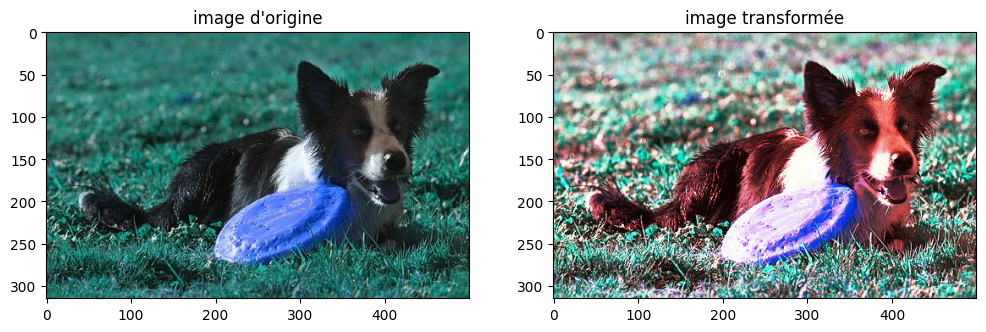

In [28]:
uri = df_img.index[np.random.randint(1000)]
image = cv2.imread(uri)
# Equalization
r_image, g_image, b_image = cv2.split(image)
r_image_eq = cv2.equalizeHist(r_image)
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)
image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
cmap_val = None

# Show both images
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("image d'origine")
plt.subplot(1, 2, 2)
plt.imshow(image_eq)
plt.title("image transformée")
plt.show()

### Suppression du bruit

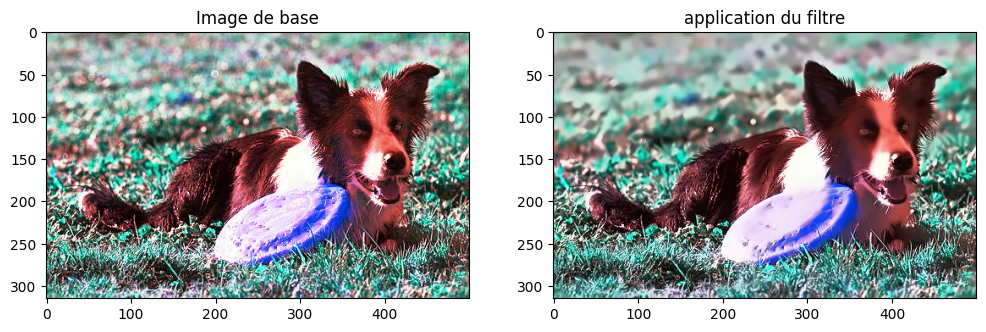

In [29]:
# Apply non-local means filter on test img
img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,7,21)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(image_eq)
plt.title("Image de base")
plt.subplot(1, 2, 2)
plt.imshow(img_nlf)
plt.title("application du filtre")
plt.show()

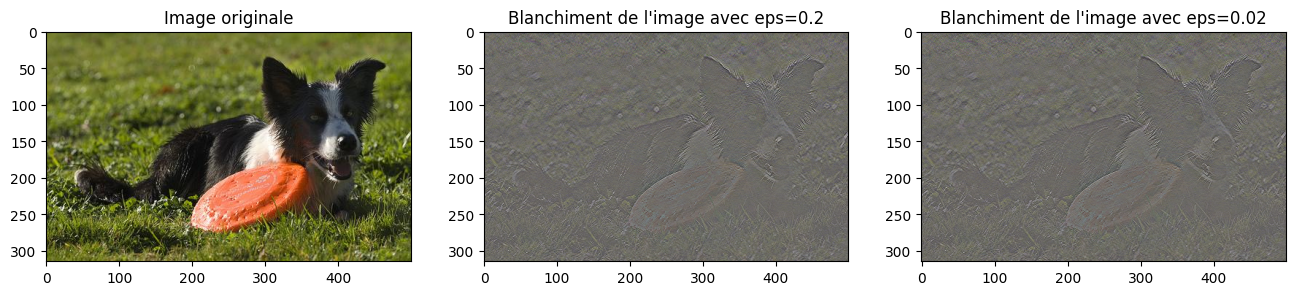

In [30]:
def whitening_channel(channel, eps):
    """Whitening for single channel."""
    channel = channel - channel.mean(axis=0)
    cov_matrix = np.cov(channel, rowvar=False)
    U, S, _ = np.linalg.svd(cov_matrix)
    channel_whitened = U.dot(np.diag(1.0/np.sqrt(S + eps))).dot(U.T).dot(channel.T).T
    return normalize_channel(channel_whitened)

def normalize_channel(channel):
    """Normalize channel values to range [0, 255]."""
    channel_min, channel_max = channel.min(), channel.max()
    return ((channel - channel_min) / (channel_max - channel_min) * 255).astype(np.uint8)

def zca_whitening(image, eps):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    channels = cv2.split(image_rgb)

    whitened_channels = [whitening_channel(channel, eps) for channel in channels]

    whitened_image = cv2.merge(whitened_channels)
    return whitened_image

image = cv2.imread(uri)
x_1 = zca_whitening(image, 0.2)
x_2 = zca_whitening(image, 0.02)

fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image originale")
plt.subplot(1, 3, 2)
plt.imshow(x_1)
plt.title("Blanchiment de l'image avec eps=0.2")
plt.subplot(1, 3, 3)
plt.imshow(x_2)
plt.title("Blanchiment de l'image avec eps=0.02")
plt.show()

### augmentation de données

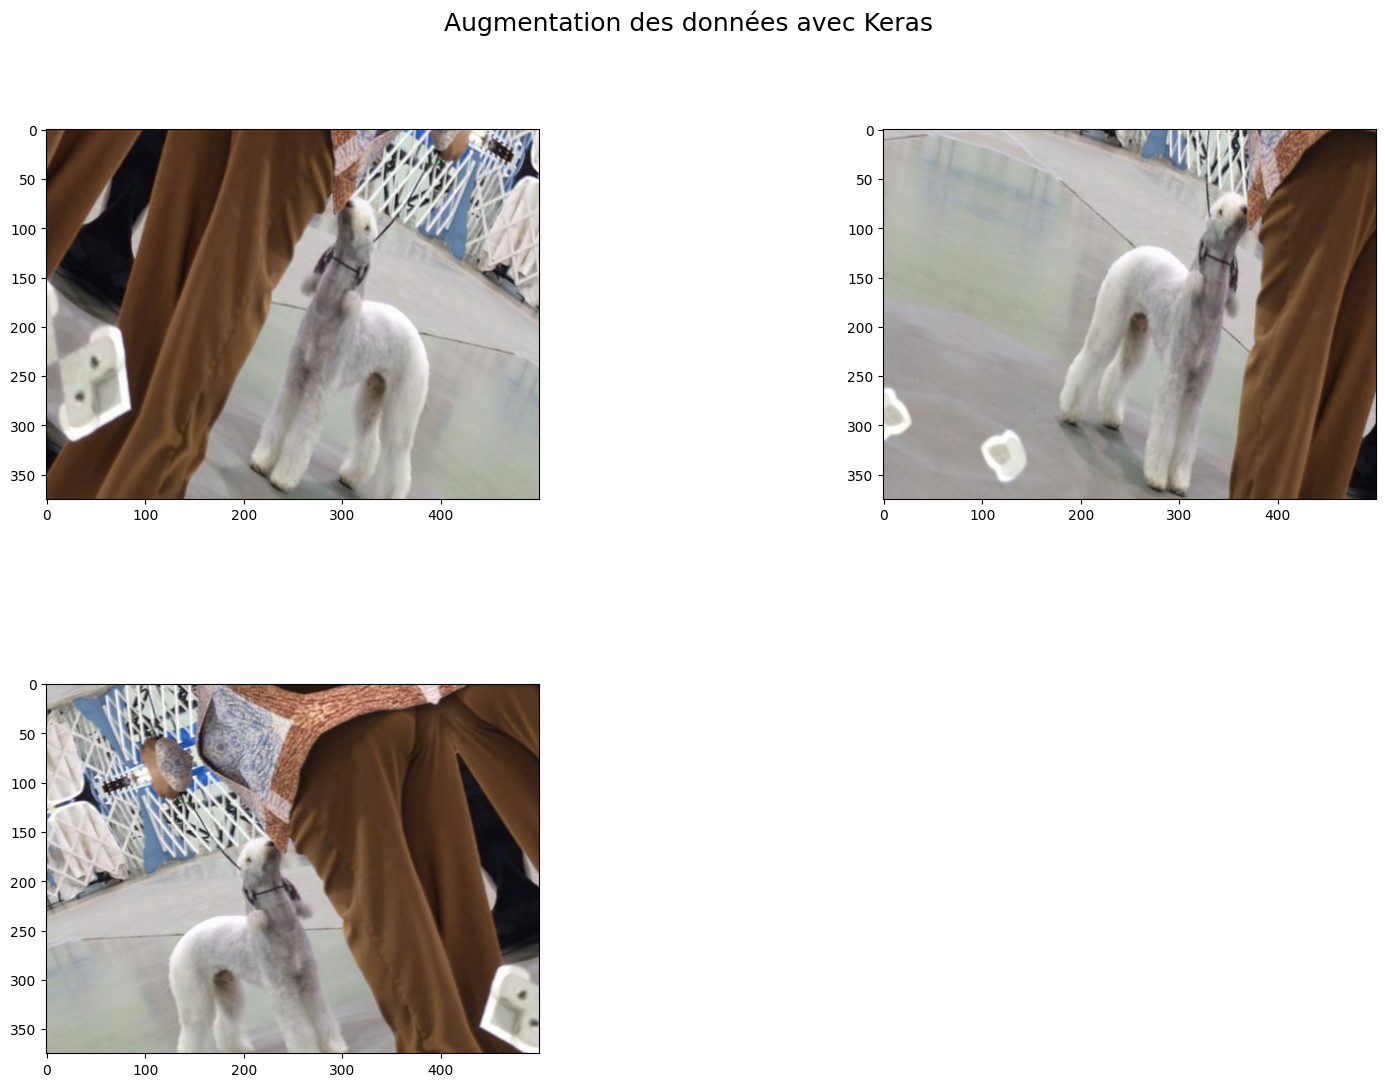

In [31]:
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')

# Convert an image to array
x = mpimg.imread(df_img.index.values[4112])
x = x.reshape((1,) + x.shape)

i = 0
fig = plt.figure(figsize=(18, 12))
for batch in datagen.flow(x, batch_size=1):
    #ax = fig.add_subplot(5, 3, i+1)
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    #if i % 15 == 0:
    if i % 3 == 0:
        break

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Augmentation des données avec Keras", fontsize=18)
plt.show()

# faire moins d'augmentation pour entrainer sinon cela va prendre trop temps
# pour l'entraintement itérer 2 ou 3 fois max pour avoir un résultat rapide et pouvoir corriger plus efficacement plutot que de perdre du temps
# une fois que c'est fini on peut en ajouter plus pour montrer le résultat

In [32]:
import os
import glob
import random

def get_image_paths_from_id_breed(id_breed):
    """
    Récupère les chemins des images pour une race donnée.

    Args:
        id_breed: L'identifiant de la race.

    Returns:
        Une liste de chemins d'images.
    """

    base_path = "./datas/Images"
    image_paths = glob.glob(os.path.join(base_path, id_breed, "*.jpg"))

    return random.sample(image_paths, 10)

#def get_image_paths_from_id_breed(id_breed):
#    base_path = "./datas/Images"
#    image_paths = glob.glob(os.path.join(base_path, id_breed, "*.jpg"))
#    return image_paths

# Testons la fonction
print(get_image_paths_from_id_breed(data['Id_breed'].iloc[0]))

['./datas/Images/n02106166-Border_collie/n02106166_6545.jpg', './datas/Images/n02106166-Border_collie/n02106166_3850.jpg', './datas/Images/n02106166-Border_collie/n02106166_5097.jpg', './datas/Images/n02106166-Border_collie/n02106166_7282.jpg', './datas/Images/n02106166-Border_collie/n02106166_3416.jpg', './datas/Images/n02106166-Border_collie/n02106166_204.jpg', './datas/Images/n02106166-Border_collie/n02106166_5073.jpg', './datas/Images/n02106166-Border_collie/n02106166_2000.jpg', './datas/Images/n02106166-Border_collie/n02106166_6879.jpg', './datas/Images/n02106166-Border_collie/n02106166_2006.jpg']


In [33]:
#identification des images non conformes
X = []
y = []
ref_shape = None
cpt = 0

for index, row in data.iterrows():
    if cpt >= 10:
        break

    image_paths = get_image_paths_from_id_breed(row['Id_breed'])

    for image_path in image_paths:
        image = cv2.imread(image_path)
        image_processed = zca_whitening(image, 0.1)

        if ref_shape is None:
            ref_shape = image_processed.shape
        else:
            if image_processed.shape != ref_shape:
                print(f"Shape mismatch! Expected {ref_shape} but got {image_processed.shape} for image {image_path}")

                cpt += 1
                if cpt >= 10:
                    break

                continue  # skip this image

        X.append(image_processed)
        y.append(row['Id'])


Shape mismatch! Expected (240, 360, 3) but got (424, 500, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_2111.jpg
Shape mismatch! Expected (240, 360, 3) but got (250, 250, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_3429.jpg
Shape mismatch! Expected (240, 360, 3) but got (388, 300, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_59.jpg
Shape mismatch! Expected (240, 360, 3) but got (232, 307, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_346.jpg
Shape mismatch! Expected (240, 360, 3) but got (500, 375, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_3996.jpg
Shape mismatch! Expected (240, 360, 3) but got (334, 500, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_1204.jpg
Shape mismatch! Expected (240, 360, 3) but got (375, 500, 3) for image ./datas/Images/n02106166-Border_collie/n02106166_331.jpg
Shape mismatch! Expected (240, 360, 3) but got (375, 500, 3) for image ./datas/Images/n02106166-Borde

In [34]:
#%%time
def preprocess_data(dataframe, target_shape=(500, 333, 3)):
   X = []
   y = []

   for index, row in dataframe.iterrows():
       image_paths = get_image_paths_from_id_breed(row['Id_breed'])
       print("end path")
       #print("Image paths:", image_paths)
       for image_path in image_paths:
           # Read and Resize
           print(image_path)
           image = cv2.imread(image_path)
           image_resized = cv2.resize(image, (target_shape[1], target_shape[0]))
           #print("end resize")

           # Equalization
           r_image, g_image, b_image = cv2.split(image_resized)
           r_image_eq = cv2.equalizeHist(r_image)
           g_image_eq = cv2.equalizeHist(g_image)
           b_image_eq = cv2.equalizeHist(b_image)
           image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
           #print("end equilization")

           # Débruitage à l'aide de NLM
           img_nlf = cv2.fastNlMeansDenoisingColored(image_eq, None, 10, 10, 7, 21)
           print("end bruit")

           # ZCA Whitening
           image_processed = zca_whitening(img_nlf, 0.1)
           #print("end Whitening")

           X.append(image_processed)
           y.append(row['Id'])

   X = np.array(X, dtype=np.float32)
   y = np.array(y)

   return X, y

#X, y = preprocess_data(data)


In [35]:
tf.config.list_physical_devices('GPU')

[]

In [36]:
data[:1]

Id_breed     breed_name         Id   nb
0  n02106166-Border_collie  Border_collie  n02106166  150

In [37]:
data_test = data[:1]
preprocess_data(data_test)

end path
./datas/Images/n02106166-Border_collie/n02106166_1205.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_324.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_243.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_1133.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_1311.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_1754.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_6569.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_2000.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02106166-Border_collie/n02106166_1246.jpg
end resize
end equilization
end bruit
end Whitening
./d

(array([[[[126., 137., 128.],
          [128., 136., 130.],
          [124., 133., 123.],
          ...,
          [125., 126., 125.],
          [118., 118., 114.],
          [124., 133., 126.]],
 
         [[124., 137., 126.],
          [130., 137., 132.],
          [126., 133., 121.],
          ...,
          [127., 129., 125.],
          [129., 131., 125.],
          [101., 109., 104.]],
 
         [[120., 132., 126.],
          [128., 139., 131.],
          [128., 133., 124.],
          ...,
          [115., 117., 112.],
          [123., 116., 110.],
          [112., 126., 112.]],
 
         ...,
 
         [[117., 125., 125.],
          [141., 144., 143.],
          [112., 114., 113.],
          ...,
          [121., 120., 113.],
          [105., 109., 114.],
          [110., 113., 110.]],
 
         [[127., 141., 150.],
          [131., 139., 139.],
          [112., 115., 111.],
          ...,
          [113., 117., 116.],
          [111., 114., 115.],
          [119., 130., 121.

In [38]:
import cv2
from functools import partial

# def process_single_image(row, target_shape=(500, 333, 3)):
#     X = []
#     y = []

#     image_paths = get_image_paths_from_id_breed(row.Id_breed)

#     for image_path in image_paths:
#         # lecture et redimensionnement
#         image = cv2.imread(image_path)
#         image_resized = cv2.resize(image, (target_shape[1], target_shape[0]))

#         # Equalization
#         r_image, g_image, b_image = cv2.split(image_resized)
#         r_image_eq = cv2.equalizeHist(r_image)
#         g_image_eq = cv2.equalizeHist(g_image)
#         b_image_eq = cv2.equalizeHist(b_image)
#         image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))

#         # Débruitage à l'aide de NLM
#         img_nlf = cv2.fastNlMeansDenoisingColored(image_eq, None, 10, 10, 7, 21)

#         # ZCA Whitening
#         image_processed = zca_whitening(img_nlf, 0.1)

#         X.append(image_processed)
#         y.append(row.Id)

#     return X, y

# def preprocess_data(dataframe, target_shape=(500, 333, 3)):
#     X = []
#     y = []

#     # Utilisation de functools.partial pour fixer la valeur de target_shape
#     func = partial(process_single_image, target_shape=target_shape)

#     with ThreadPoolExecutor(max_workers=4) as executor:
#         results = list(executor.map(func, dataframe.itertuples(index=True, name='Pandas')))

#     for result in results:
#         X.extend(result[0])
#         y.extend(result[1])

#     X = np.array(X, dtype=np.float32)
#     y = np.array(y)

#     return X, y


#### Entainement du modèle CNN, on va prendre un certains nombre d'images pour limiter les calculs, par exemple le top 10

Image exists: True


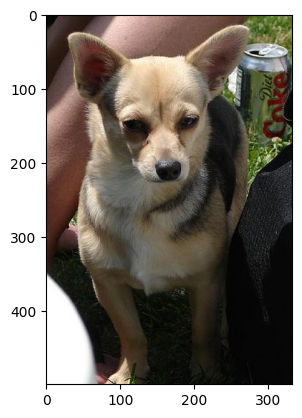

In [39]:
import os

image_path = './datas/Images/n02085620-Chihuahua/n02085620_10074.jpg'
image_exists = os.path.exists(image_path)
print("Image exists:", image_exists)

import cv2
import matplotlib.pyplot as plt

image = cv2.imread(image_path)

# Convertir de BGR à RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()


In [40]:
image_paths = get_image_paths_from_id_breed(row['Id_breed'])
print(f'Image paths for ID {row["Id_breed"]}: {image_paths}')

Image paths for ID n02099267-flat-coated_retriever: ['./datas/Images/n02099267-flat-coated_retriever/n02099267_979.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_3335.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_3490.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_3611.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_5745.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_2160.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_3948.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_1573.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_2127.jpg', './datas/Images/n02099267-flat-coated_retriever/n02099267_482.jpg']


In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from concurrent.futures import ThreadPoolExecutor

# Nombre de races et d'images à traiter
nb_breeds = 50  # Réduit de 500 à 100

# Mesure du temps de début
start_time = time.perf_counter()

# Sélection des URIs d'images et des noms de races pour le nombre de races donné
total_images = np.sum(data.nb.values[0:nb_breeds])
print("Total images:", total_images)

# Fusion des dataframes pour obtenir toutes les informations nécessaires
combined_df = pd.merge(df_img, data, left_on='bread_name', right_on='breed_name', how='inner')

# Échantillonnage aléatoire pour réduire la taille du dataframe
combined_df = combined_df.sample(frac=0.1)  # Prend 50% des données

print("Size of combined DataFrame:", len(combined_df))

# Prétraitement des images
X, y = preprocess_data(combined_df)

# Encodage des labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Calcul et affichage du temps écoulé
elapsed_time = time.perf_counter() - start_time
print("Preprocessing time :", round(elapsed_time, 1), "seconds")
print("Number of images preprocessed:", X.shape[0])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
end bruit
end Whitening
end path
./datas/Images/n02093754-Border_terrier/n02093754_1464.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_6257.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_175.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_667.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_5298.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_2742.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_180.jpg
end resize
end equilization
end bruit
end Whitening
./datas/Images/n02093754-Border_terrier/n02093754_3725.jpg
end resize
end equilization
end bruit
end Whitening
./da

In [ ]:
import random
import matplotlib.pyplot as plt

# Vérification de la longueur de X
if len(X) > 0:
    index_random = random.randint(0, len(X) - 1)
    plt.imshow(X[index_random])
    plt.show()
else:
    print("X est vide. Impossible de sélectionner un élément aléatoire.")


In [ ]:
# affichons un exemple aléatoirement:
import random
import matplotlib.pyplot as plt

index_random = random.randint(0, len(X) - 1)
plt.imshow(X[index_random])
plt.show()

#### préparation des données de test et d'entraintement

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

In [ ]:
# augmentons les données d'entraintement avec remise à l'echelle des données de test.
# pour rappel l'augmentation des données est utilisée pour générer des données artificiellement en plus pour l'entrainement à partir de l'ensemble de données de base
# en appliquant différentes transformations, cela permet d'éviter le surapprentisage.

df_train = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', validation_split=0.2)
df_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# fonction de génération du modèle
from keras.layers import Input

def create_breed_classification_cnn (filt=32, ker_s=(3, 3), wind=(2, 2), strd=2, f_act='relu', nb_breed=120):
    """
    """
    K.clear_session()
    model = Sequential()

    # Première couche de convolution
    model.add(Conv2D(filters=filt, kernel_size=ker_s, input_shape=(300, 300, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(f_act))
    model.add(MaxPooling2D(pool_size=wind, strides=strd, padding='same'))
    model.add(Dropout(0.25))  # Dropout après MaxPooling pour régularisation

    # Deuxième couche de convolution
    model.add(Conv2D(filters=2*filt, kernel_size=ker_s, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(f_act))
    model.add(MaxPooling2D(pool_size=wind, strides=strd, padding='same'))
    model.add(Dropout(0.25))

    # Troisième couche de convolution
    model.add(Conv2D(filters=4*filt, kernel_size=ker_s, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(f_act))
    model.add(MaxPooling2D(pool_size=wind, strides=strd, padding='same'))
    model.add(Dropout(0.25))

    # Quatrième couche de convolution
    model.add(Conv2D(filters=8*filt, kernel_size=ker_s, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(f_act))

    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))

    # Couches entièrement connectées
    model.add(Dense(16*filt, activation=f_act))
    model.add(Dense(nb_breed, activation='softmax'))

    return model

In [ ]:
# affichage de l'entraintement
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_param_impact_on_training (result, Columns, name):
    """
    Fonction permettant de tracer des courbes de scores pour différentes valeurs de paramètres dans la liste Columns.

    Paramètres :
    - result : Dictionnaire des résultats historiques du modèle CNN.
    - Colonnes : Liste des valeurs des paramètres.
    - name : Nom du paramètre analysé.
    """
    # Extraire la perte de validation et la précision pour chaque colonne
    val_loss = {k: v.history['val_loss'] for k, v in result.items()}
    val_acc = {k: v.history['val_accuracy'] for k, v in result.items()}

    val_loss_curves = pd.DataFrame(val_loss)
    val_loss_curves.columns = Columns
    val_acc_curves = pd.DataFrame(val_acc)
    val_acc_curves.columns = Columns

    # Définir le style des tracés
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.5})

    # Tracé de la perte de validation et de la précision pour chaque colonne
    for col in Columns:
        ax[0].plot(val_loss_curves[col], label=col)
        ax[1].plot(val_acc_curves[col], label=col)

    # Définition des titres, des étiquettes, des légendes et des tailles de police
    ax[0].set_title(f"Impact of {name} on the Loss", fontsize=16)
    ax[0].set_xlabel('Epoch', fontsize=14)
    ax[0].set_ylabel('Loss', fontsize=14)
    ax[0].legend(fontsize=12)

    ax[1].set_title(f"Impact of {name} on the Accuracy", fontsize=16)
    ax[1].set_xlabel('Epoch', fontsize=14)
    ax[1].set_ylabel('Accuracy', fontsize=14)
    ax[1].legend(fontsize=12)

    # Affichage de la grille pour une meilleure lisibilité
    ax[0].grid(True)
    ax[1].grid(True)

    # affichage
    plt.show()


In [ ]:
def train_model_with_activation(activation_func, train_data, val_data, epochs=20, batch_size=16):
    """Trains a CNN model with a specified activation function."""

    # Initialize model with the specified activation function
    model = model_cnn(16, 3, 2, 2, activation_func, 5)

    # Compile the CNN model
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics="accuracy")

    # Train the model
    history = model.fit(train_data,
                        validation_data=val_data,
                        steps_per_epoch=len(X_train) / batch_size,
                        epochs=epochs)

    return history

# Activation functions to test
act_fun = ['relu', 'sigmoid', 'selu', 'tanh']
result = {}

# Data generators
train_data = train_datagen.flow(X_train, y_train, batch_size=16, subset='training')
val_data = train_datagen.flow(X_train, y_train, batch_size=16, subset='validation')

# Train model for each activation function and store results
for f_act in act_fun:
    result[f_act] = train_model_with_activation(f_act, train_data, val_data)

# Plot the impact of each activation function on training using the improved function
plot_param_impact_on_training(result, act_fun, 'activation function')

In [ ]:
# optimisation

def train_model_with_optimizer(optimizer, train_datagen, X_train, y_train, batch_size=16, epochs=20):
    """
    Entraîne un modèle CNN à partir d'un optimiseur spécifique.
    Retourne l'historique de la formation
    """
    model = model_cnn(16, 3, 2, 2, "relu", 5)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics="accuracy")

    history = model.fit(
        df_train.flow(X_train, y_train, batch_size=batch_size, subset='training'),
        validation_data=df_trainest-ce qe.flow(X_train, y_train, batch_size=batch_size, subset='validation'),
        steps_per_epoch=len(X_train) / 32,
        epochs=epochs
    )

    return history

optimizers = ['adam', 'SGD', 'adamax']
result = {}

for optimizer in optimizers:
    result[optimizer] = train_model_with_optimizer(optimizer, train_datagen, X_train, y_train)

Columns = optimizers
name = 'optimizer'
plot_scores_curves(result, Columns, name)


# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def train_model_with_activation(activation_func, train_data, val_data, base_model, epochs=20, batch_size=16):
    """
    Entraîne un modèle avec une fonction d'activation spécifiée sur la dernière couche dense.
    """

    # Ajout des couches personnalisées
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation=activation_func)(x)
    predictions = Dense(len(set(y_encoded)), activation='softmax')(x)

    # Composer le modèle
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compiler le modèle
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle
    history = model.fit(train_data,
                        validation_data=val_data,
                        steps_per_epoch=len(X_train) / batch_size,
                        epochs=epochs)

    return history

# Charger VGG16 avec des poids pré-entraînés
base_model = VGG16(weights='imagenet', include_top=False)

# Fonctions d'activation à tester
act_fun = ['relu', 'sigmoid', 'selu', 'tanh']
result = {}

# Générateurs de données
train_data = train_datagen.flow(X_train, y_train, batch_size=16)
val_data = train_datagen.flow(X_test, y_test, batch_size=16)

# Entraîner le modèle pour chaque fonction d'activation et stocker les résultats
for f_act in act_fun:
    result[f_act] = train_model_with_activation(f_act, train_data, val_data, base_model)

# Tracer l'impact de chaque fonction d'activation sur l'entraînement en utilisant la fonction améliorée
plot_param_impact_on_training(result, act_fun, 'activation function')



# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def train_model_with_activation(activation_func, train_data, val_data, base_model, epochs=20, batch_size=16):
    """
    Entraîne un modèle avec une fonction d'activation spécifiée sur la dernière couche dense.
    """

    # Ajout des couches personnalisées
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation=activation_func)(x)
    predictions = Dense(len(set(y_encoded)), activation='softmax')(x)

    # Composer le modèle
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compiler le modèle
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle
    history = model.fit(train_data,
                        validation_data=val_data,
                        steps_per_epoch=len(X_train) / batch_size,
                        epochs=epochs)

    return history

# Charger ResNet50 avec des poids pré-entraînés
base_model = ResNet50(weights='imagenet', include_top=False)

# Fonctions d'activation à tester
act_fun = ['relu', 'sigmoid', 'selu', 'tanh']
result = {}

# Générateurs de données
train_data = train_datagen.flow(X_train, y_train, batch_size=16)
val_data = train_datagen.flow(X_test, y_test, batch_size=16)

# Entraîner le modèle pour chaque fonction d'activation et stocker les résultats
for f_act in act_fun:
    result[f_act] = train_model_with_activation(f_act, train_data, val_data, base_model)

# Tracer l'impact de chaque fonction d'activation sur l'entraînement en utilisant la fonction améliorée
plot_param_impact_on_training(result, act_fun, 'activation function')
